In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#Set a seed for reprodible results
np.random.seed(0)
# Number of data points
n = 1000

In [5]:
# Creating a DataFrame with the following columns:
# 'game': the game being advertised, a categorical variable
# 'campaign': the advertising campaign, a categorical variable
# 'impressions': the number of ad impressions, a numerical variable
# 'clicks': the number of ad clicks, a numerical variable
# 'engagement': a measure of user engagement, a numerical variable
# 'sales': the number of games sold, a numerical variable

df = pd.DataFrame({
    'game': np.random.choice(['Game A', 'Game B', 'Game C', 'Game D'], n),
    'campaign': np.random.choice(['Campaign 1', 'Campaign 2', 'Campaign 3'], n),
    'impressions': np.random.poisson(10, n) * 100,
    'clicks': np.random.poisson(1, n) * 10,
    'engagement': np.random.normal(50, 10, n).clip(0, 100),  # This will ensure values are between 0 and 100
    'sales': np.random.poisson(2, n)
})

# Adding random variation to sales in relation with clicks
df['sales'] += (df['clicks'] / df['clicks'].max()) * np.random.normal(scale=3, size=n)

# Make sure sales can't be less than 0
df['sales'] = df['sales'].clip(0)

# Let's see the first few rows of our DataFrame
print(df.head())

     game    campaign  impressions  clicks  engagement     sales
0  Game A  Campaign 3          900       0   47.329546  4.000000
1  Game B  Campaign 1          700       0   51.741062  3.000000
2  Game A  Campaign 3          900       0   44.783005  2.000000
3  Game D  Campaign 3         1000      30   41.007972  1.989717
4  Game A  Campaign 3         1100      20   53.179418  2.282684


## As this dataset is generated by me, cleaning is not needed. Therefore, I will begin with Exploratory Analysis. 

#### General Overview

In [6]:
# Display the first few rows of the DataFrame
print(df.head())

# Get a summary of the numerical data
print(df.describe())

# Check for missing values
print(df.isnull().sum())

     game    campaign  impressions  clicks  engagement     sales
0  Game A  Campaign 3          900       0   47.329546  4.000000
1  Game B  Campaign 1          700       0   51.741062  3.000000
2  Game A  Campaign 3          900       0   44.783005  2.000000
3  Game D  Campaign 3         1000      30   41.007972  1.989717
4  Game A  Campaign 3         1100      20   53.179418  2.282684
       impressions       clicks   engagement        sales
count  1000.000000  1000.000000  1000.000000  1000.000000
mean    976.900000     9.520000    49.913944     2.085906
std     305.433593     9.882675     9.838866     1.530975
min     200.000000     0.000000    20.180803     0.000000
25%     800.000000     0.000000    43.579481     1.000000
50%    1000.000000    10.000000    49.277864     2.000000
75%    1200.000000    10.000000    56.647476     3.000000
max    1900.000000    60.000000    83.795401     9.037543
game           0
campaign       0
impressions    0
clicks         0
engagement     0
sal

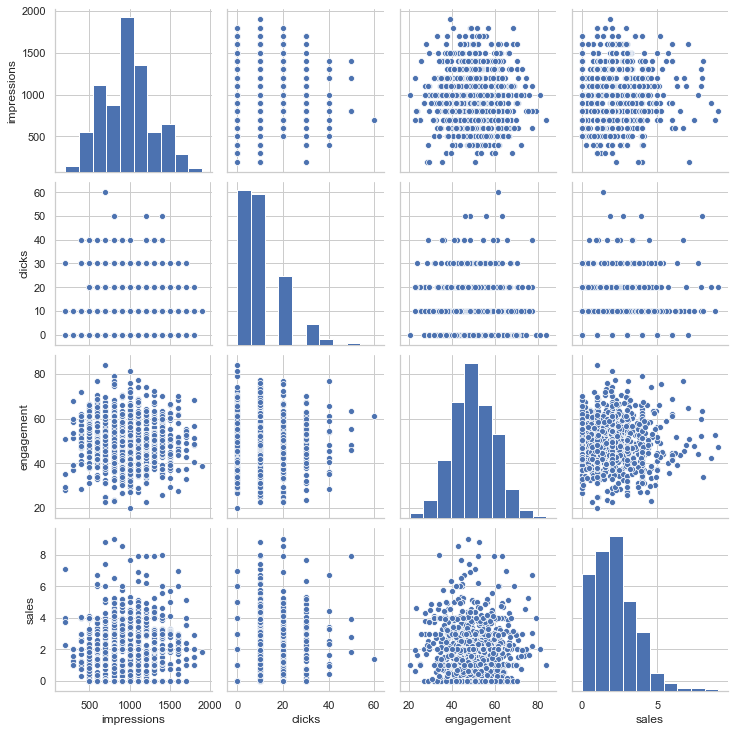

In [9]:
# Set style
sns.set(style="whitegrid")

# Create pairplot to visualize the relationship between variables
sns.pairplot(df)
plt.show()


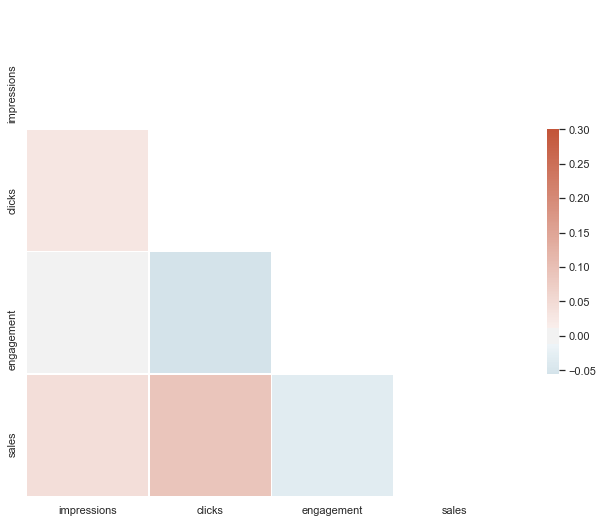

In [10]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### With the heat map we see interesting correlations between variables such as clicks and sales having the highest positive correlation.

In [14]:

# Define our inputs and output
X = df[['clicks', 'impressions']]
y = df['sales']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of our predictions
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')


Mean Squared Error: 2.9203827399539777


In [19]:
# Create interaction term
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a linear regression model
model_poly = LinearRegression()

# Fit the model to the training data
model_poly.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred_poly = model_poly.predict(X_test_poly)

# Calculate the mean squared error of our predictions
mse_poly = mean_squared_error(y_test, y_pred_poly)

print(f'Mean Squared Error with interaction term: {mse_poly}')

Mean Squared Error with interaction term: 2.919686240625919


### Evaluation and Business Decisions
The regression model we've built provides useful insights that can significantly influence business decisions. Here are some key takeaways and potential actions:

1. Budget Allocation:
 The model suggests that both clicks and impressions have a positive association with sales. Therefore, we can consider allocating advertising budget to maximize these two metrics. This could involve investing in advertising channels that have proven to generate high clicks and impressions.

2. Ad Campaign Strategy:
Our model includes an interaction term which suggests that the relationship between clicks and sales, and impressions and sales, is not independent. This could imply that a balanced strategy, targeting both clicks and impressions, could potentially lead to higher sales.

3. Performance Evaluation:
The model could serve as a tool to evaluate the performance of different advertising campaigns. For instance, campaigns that underperform (i.e., have lower actual sales than what the model predicts) could be flagged for further investigation. This could help identify areas for improvement.

4. Sales Forecasting:
The model can be used to predict future sales based on planned ad impressions and clicks. This could be particularly useful during budgeting and strategic planning.

It's important to remember that this model is based on simulated data and makes certain simplifying assumptions. In a real-world scenario, other factors not included in the model, like product quality, customer service, competition, etc., could also impact sales. Also, the model needs to be continually updated and validated as new data becomes available and market conditions evolve.

